In [5]:
#1 LOADING THE DATA TO THE PYTHON
import csv
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

file_name= '~/Desktop/Tutorial_06/Tutorial_06_with_supplementary/ADNI_Tadpole_data_tutorial.xlsx'
data = pd.read_excel(file_name)
data.head()

,PTID,SUVR,Amyloid status,AGE,GENDER,EDUCATION,Diagnosis,ApoE4,CDRSB,ADAS11,...,Supramarginal gyrus left volume,Superior parietal Lobule right volume,Superior parietal Lobule left volume,Superior temporal gyrus right volume,Superior temporal gyrus left volume,Temporal pole right volume,Temporal pole left volume,Transverse temporal gyrus right volume,Transverse temporal gyrus left volume,Cerebrospinal fluid total volume
0,002_S_2010,1.14728,1,62.9,0,20,3,1,0.5,3.0,...,9547,11291,11409,12412,13006,1751,1915,886,1110,1149
1,002_S_2043,1.20402,1,72.2,0,20,3,1,0.5,2.0,...,10008,11898,11961,10394,11160,2289,2788,865,970,883
2,002_S_2073,1.18124,1,63.4,0,20,3,0,0.5,1.0,...,12367,13571,12420,11596,11616,2774,3271,937,1110,1548
3,002_S_4171,1.55195,1,69.4,1,16,2,0,0.5,1.5,...,8403,12811,12029,9351,9191,2030,1675,870,1058,1632
4,002_S_4219,1.04458,0,79.4,0,17,2,0,0.5,1.0,...,9268,11711,12264,9192,10030,1931,2189,966,1188,1354


In [6]:
#2 EXTRACTING THE REQUIRED VARIABLE AND DATA
y_target = data['Amyloid status']
x_data = data.drop(['PTID', 'SUVR', 'Amyloid status'], axis=1)

In [9]:
#BUILDING A APOE4 CLASSIFIER for age, gender, education and apoE4
age= data['AGE'].to_numpy()
gender = data['GENDER'].to_numpy()
edu = data['EDUCATION'].to_numpy()
apoe= data['ApoE4'].to_numpy()

y=data['Amyloid status']
logit= -0.027*age - 0.165*gender+0.080*edu+2.42*apoe+0.659
api=np.exp(logit)/(1+np.exp(logit))

AUC : 0.6893
Accuracy: 0.7037


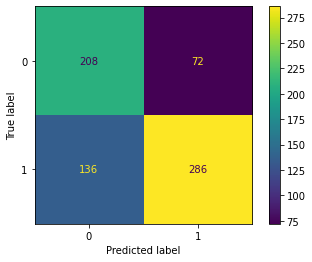

In [13]:
#EVALUATING THE APOE4 CLASSIFIER
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score

print('AUC : {:.4f}'.format(roc_auc_score(y,api)))
print('Accuracy: {:.4f}'.format(accuracy_score(y, api>0.6)))

cm = confusion_matrix(y, api>0.6)
display= ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()